Task 2: Predict Future Stock Prices (Short-Term)

Objective:

Use historical stock data to predict the next day's closing price.
Dataset:

Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
Instructions:


● Select a stock (e.g., Apple, Tesla).

● Load historical data using the yfinance library.

● Use features like Open, High, Low, and Volume to predict the next Close price.

● Train a Linear Regression or Random Forest model.

● Plot actual vs predicted closing prices for comparison.





Skills:

● Time series data handling

● Regression modeling

● Data fetching using APIs (yfinance)

● Plotting predictions vs real data

## 1. Install required libraries (if not already)




In [3]:
!pip install yfinance scikit-learn matplotlib pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Load stock data using yfinance

In [49]:
import yfinance as yf
import pandas as pd

# Select stock and load historical data
ticker = 'AAPL'  # You can change to 'TSLA', 'GOOG', etc.
data = yf.download(ticker, start='2022-01-01', end='2024-12-31')

# Display basic info
print(data.head())


C:\Users\DELL\AppData\Local\Temp\ipykernel_3184\193696586.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645645  179.499574  174.425140  174.542917  104487900
2022-01-04  176.378342  179.558457  175.809061  179.254190   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820694  172.059699  168.467348  169.507752   96904000
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100


## 3. Prepare data for prediction

In [35]:
# Shift the 'Close' column to create target for "next day's" close price
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row (because it has no Next_Close value)
data = data.dropna()

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']


## 4. Train-test split & Model training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Train/Val/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2

# Train model on training set
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Validation
val_pred = ridge_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print("Validation MSE:", round(val_mse, 4))
print("Validation R²:", round(val_r2, 4))

# Test
y_pred = ridge_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test MSE:", round(test_mse, 4))
print("Test R²:", round(test_r2, 4))


Validation MSE: 6.4791
Validation R²: 0.922
Test MSE: 16.3465
Test R²: 0.9184


## 5. Plot Actual vs Predicted Closing Prices

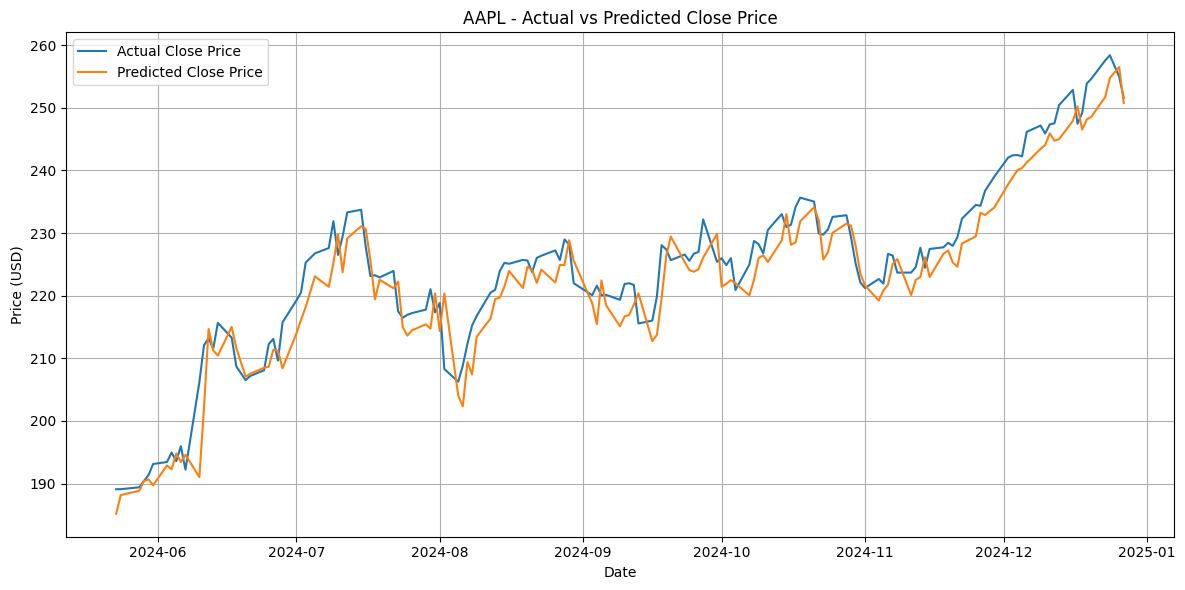

In [46]:
import matplotlib.pyplot as plt

# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Actual_Close': y_test,
    'Predicted_Close': y_pred
}, index=y_test.index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(comparison['Actual_Close'], label='Actual Close Price')
plt.plot(comparison['Predicted_Close'], label='Predicted Close Price')
plt.title(f'{ticker} - Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd

# Example input: one day's stock data
# Format: High, Low, Open, Volume
new_data = pd.DataFrame([[220, 250, 250.5, 94000000]],
                        columns=['High', 'Low', 'Open', 'Volume'])

# Predict closing price
predicted_close = ridge_model.predict(new_data)[0]
print("Predicted Closing Price:", round(predicted_close, 2))


Predicted Closing Price: 273.88


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
